In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
dir = os.getcwd()

In [3]:
data_path = os.path.join(dir,'data')

In [4]:
print(os.listdir(data_path))

['daily.csv']


In [5]:
data = pd.read_csv(os.path.join(data_path,'daily.csv'))

In [6]:
data.head()

,DATE,DGS10
0,1962-01-02,4.06
1,1962-01-03,4.03
2,1962-01-04,3.99
3,1962-01-05,4.02
4,1962-01-08,4.03


In [7]:
data['DATE'] = data['DATE'].apply(lambda x: (datetime.strptime(x, '%Y-%m-%d')))

In [8]:
data['DGS10'] = np.where(data['DGS10'] == '.',np.nan,data['DGS10'])

In [9]:
data['DGS10'] = data['DGS10'].astype(float)

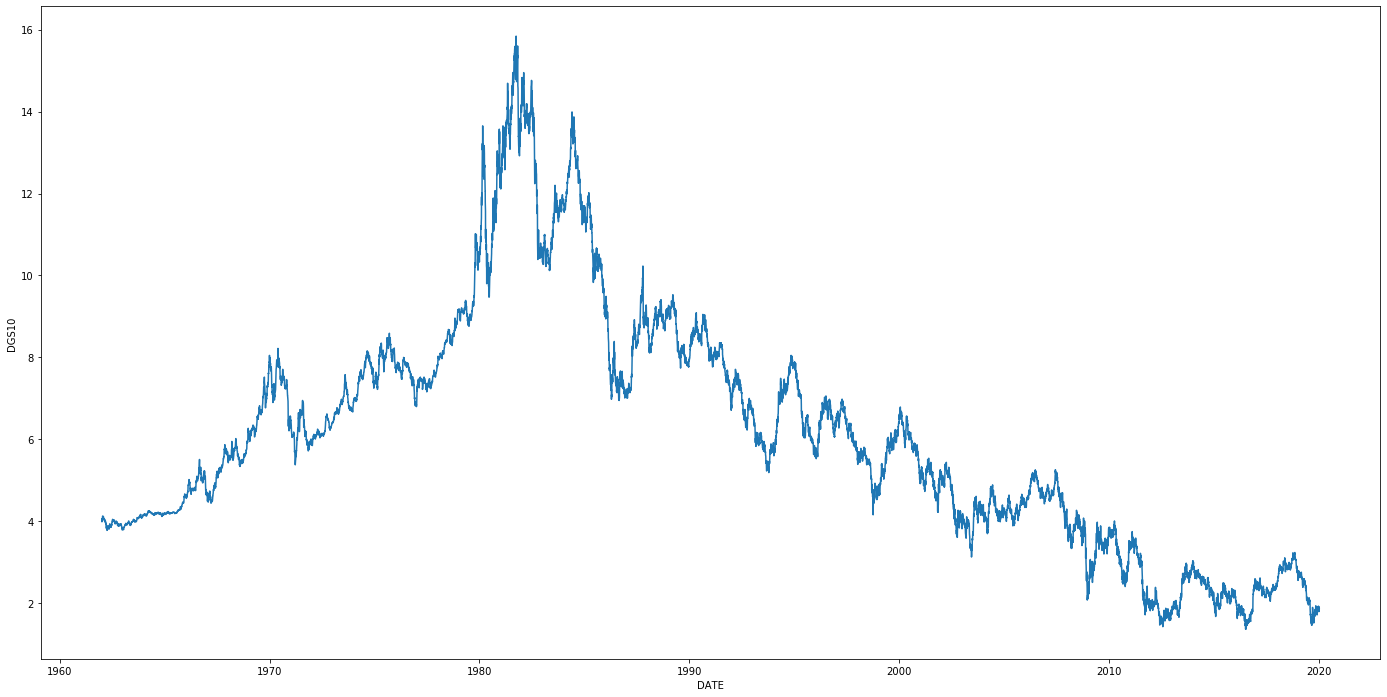

In [21]:
fig, ax = plt.subplots(figsize=(24,12))
sns.lineplot(x='DATE', y='DGS10', data=data, ax=ax)
plt.show()

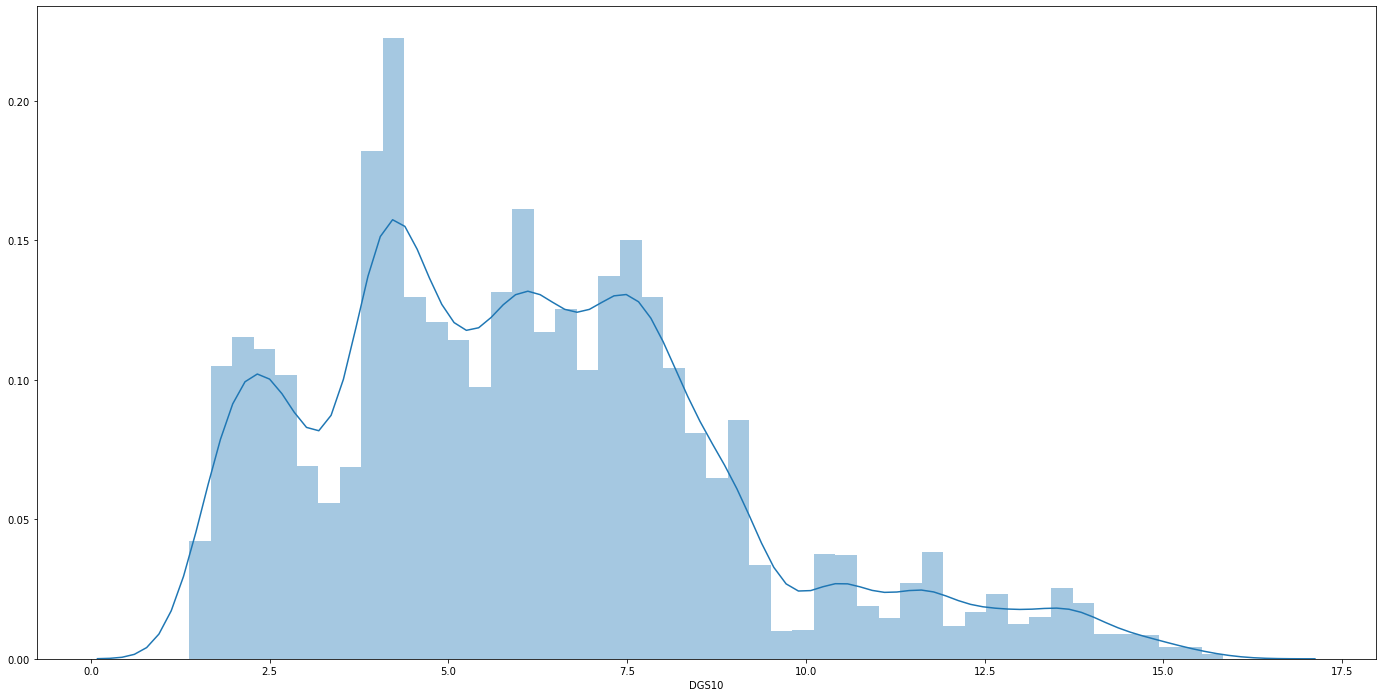

In [22]:
fig, ax = plt.subplots(figsize = (24,12))
sns.distplot(data['DGS10'].loc[data['DGS10'].notna()], ax=ax)
plt.show()

In [28]:
data['year'] = data['DATE'].apply(lambda x: x.year)
data['month'] = data['DATE'].apply(lambda x: x.month)

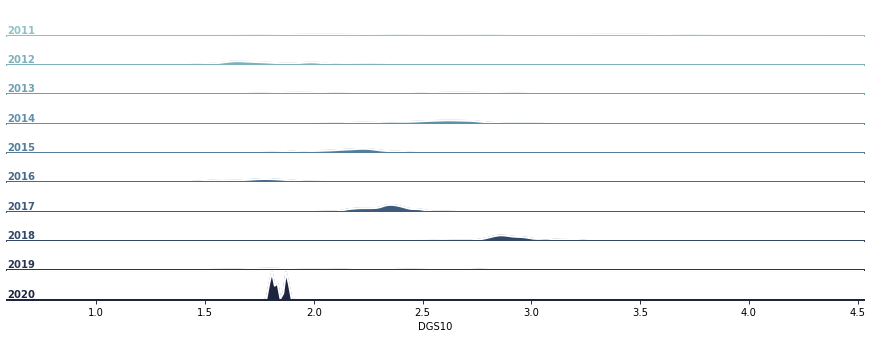

In [42]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data.loc[data['year'] >= 2011], row='year', hue='year', aspect=25, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'DGS10', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'DGS10', clip_on=False, color='w', lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color=color,
            ha='left', va='center', transform=ax.transAxes)


g.map(label, 'DGS10')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=0)

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)

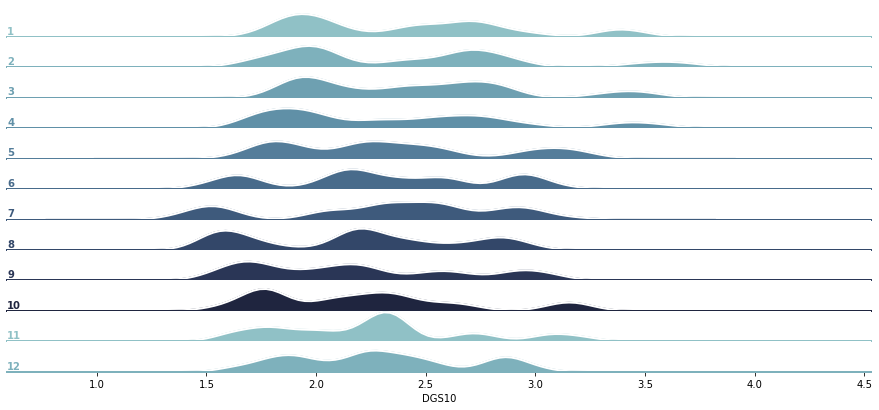

In [45]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data.loc[data['year'] >= 2011], row='month', hue='month', aspect=25, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'DGS10', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'DGS10', clip_on=False, color='w', lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color=color,
            ha='left', va='center', transform=ax.transAxes)


g.map(label, 'DGS10')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=0)

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [50]:
data['change'] = (data['DGS10']-(data['DGS10'].shift(periods=1, axis=0, fill_value=0)))/(data['DGS10'].shift(periods=1, axis=0, fill_value=0))

In [63]:
data['change'] = np.where(data['change'] == np.inf,0,data['change'])

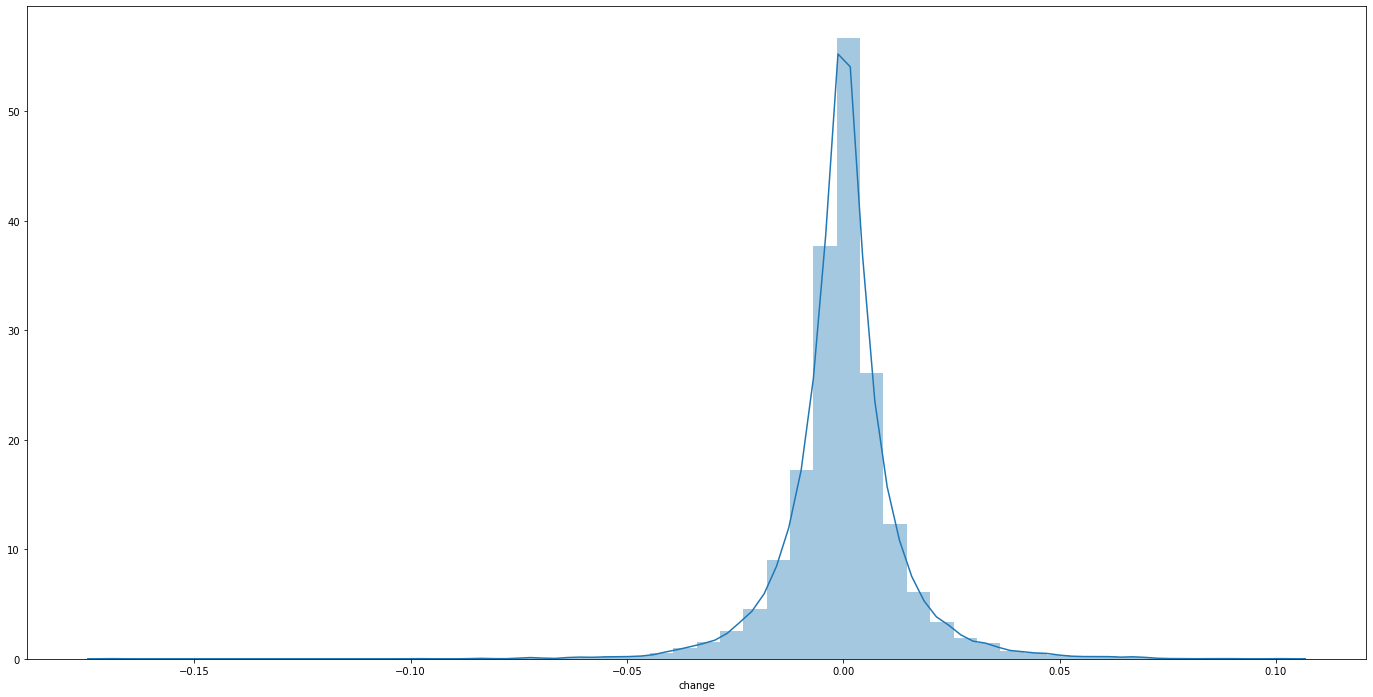

In [64]:
fig, ax = plt.subplots(figsize = (24,12))
sns.distplot(data['change'].loc[data['change'].notna()], ax=ax)
plt.show()

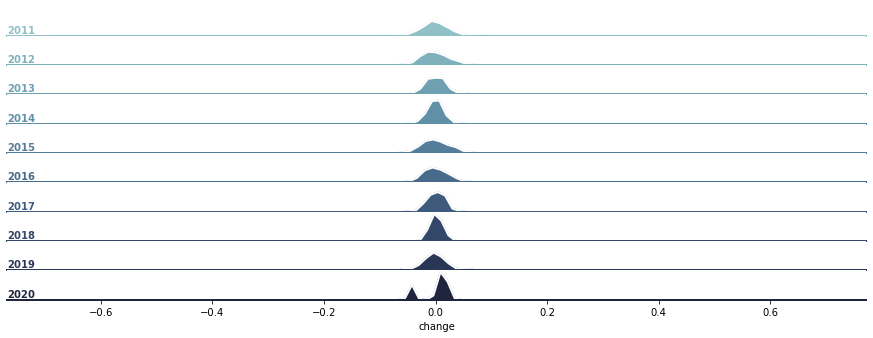

In [69]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data.loc[data['year'] >= 2011], row='year', hue='year', aspect=25, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'change', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'change', clip_on=False, color='w', lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color=color,
            ha='left', va='center', transform=ax.transAxes)


g.map(label, 'change')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=0)

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)

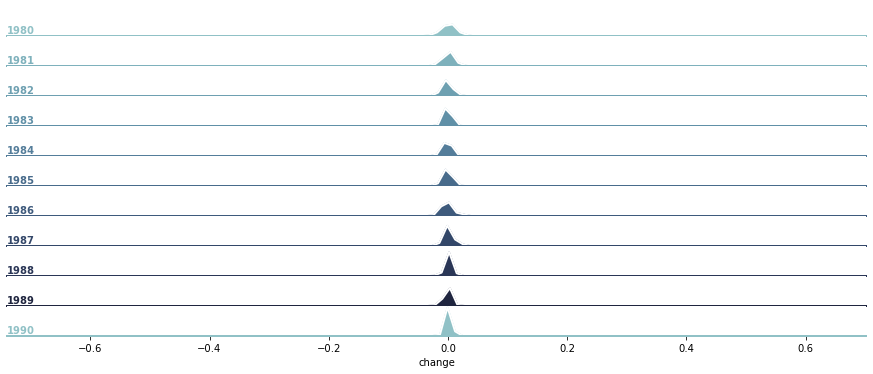

In [77]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data.loc[(data['year'] >= 1980) & (data['year'] <= 1990)], row='year', hue='year', aspect=25, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'change', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'change', clip_on=False, color='w', lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color=color,
            ha='left', va='center', transform=ax.transAxes)


g.map(label, 'change')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=0)

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)

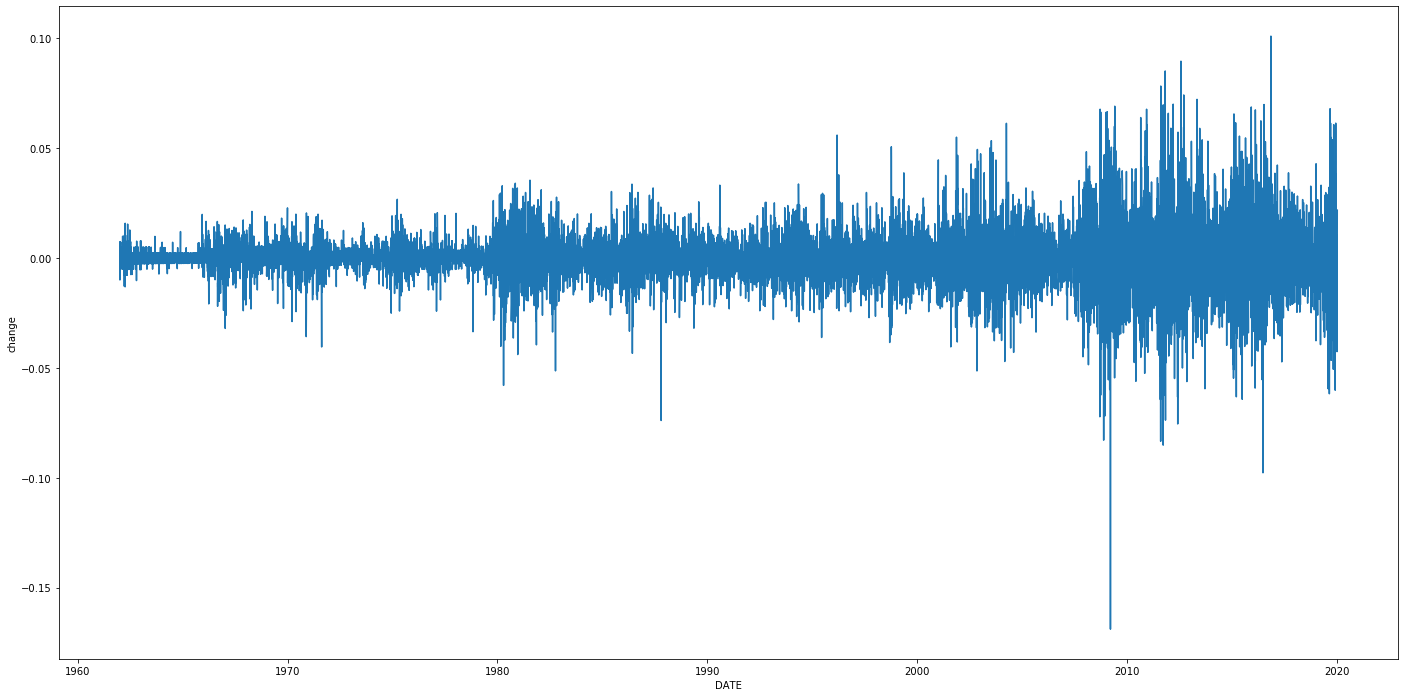

In [78]:
fig, ax = plt.subplots(figsize=(24,12))
sns.lineplot(x='DATE', y='change', data=data, ax=ax)
plt.show()

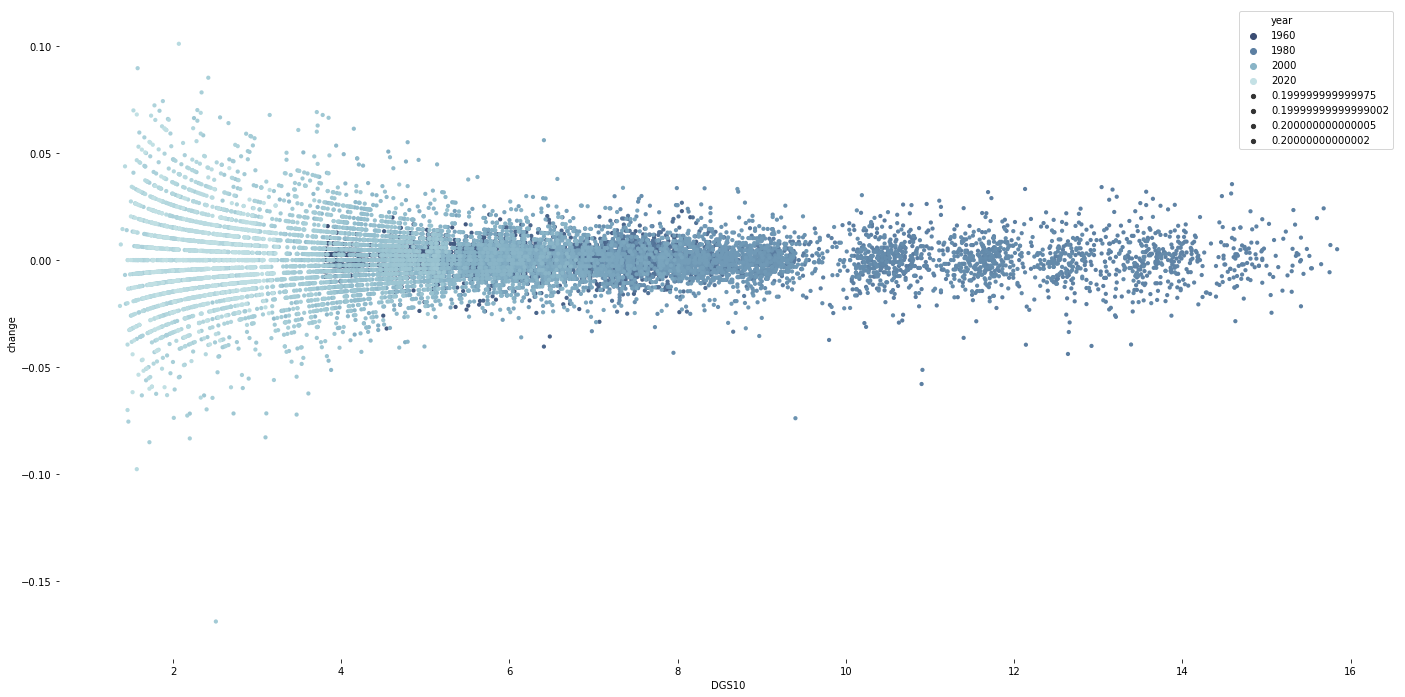

In [98]:
f, ax = plt.subplots(figsize=(24, 12))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='DGS10', y='change',
                hue='year', size=0.2,
                palette='ch:r=-.2,d=.3_r',
                linewidth=0,
                data=data, ax=ax)

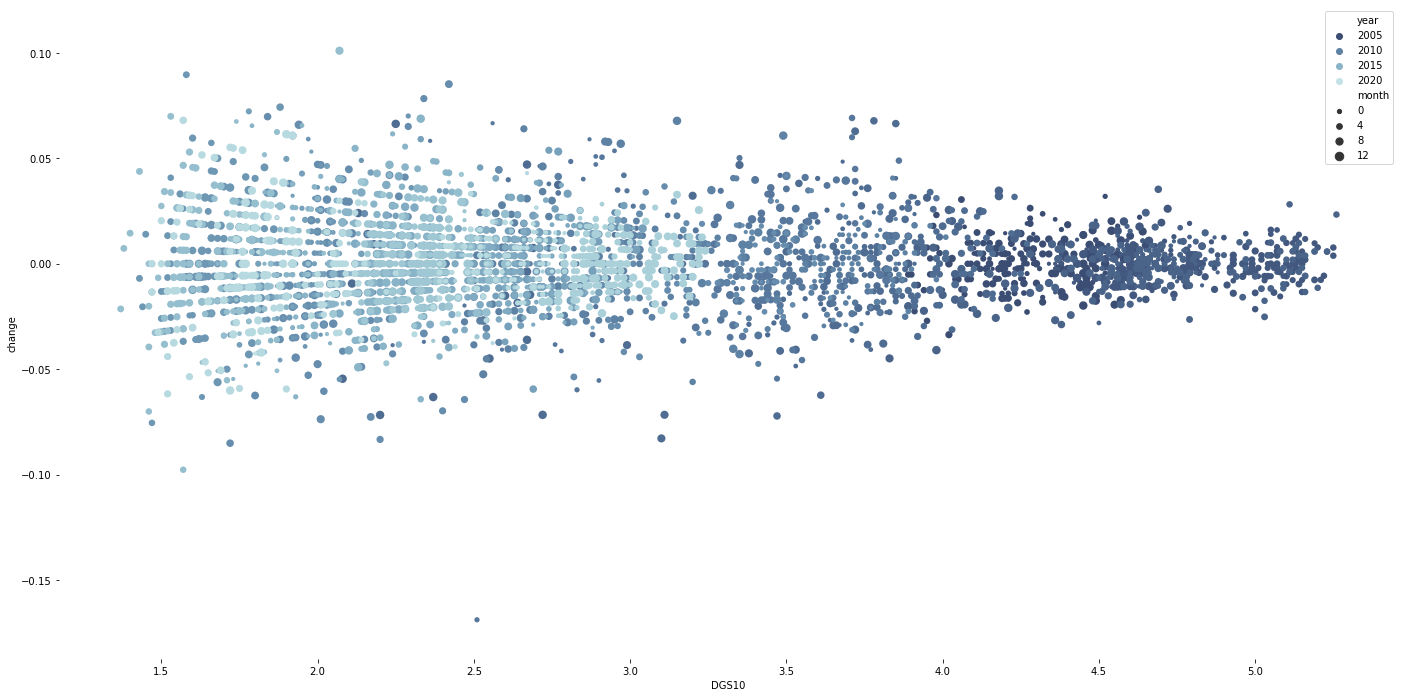

In [97]:
f, ax = plt.subplots(figsize=(24, 12))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='DGS10', y='change',
                hue='year', size='month',
                palette='ch:r=-.2,d=.3_r',
                linewidth=0,
                data=data.loc[data['year'] >= 2005], ax=ax)